# Fundraising Campaign Project

**Group Members**
- COLOMBIER Remi
- DUTRABRUNO Tatiane
- FAN1 Fangda

## Import packages and libraries

In [1142]:
# import packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats   import winsorize

from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from scipy import stats
import pandas as pd 
import numpy as np
import datetime as dt

from sklearn.ensemble import RandomForestClassifier

import shap
shap.initjs()
from pandas               import DataFrame

## Import and clean datasets

In [1143]:
# load campaigns 6169 data as:
campaign6169 = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\selection campaign 6169.csv")

# load campaigns 7244 data as:
campaign7244 = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\selection campaign 7244.csv")

# load donors data as:
donors = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\donors.csv", index_col = False)

# load campaigns data as:
campaigns = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\campaigns.csv", sep = ';')

# load gifts data as:
gifts = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\gifts.csv")

### Campaign 6169

Load Campaign 6169 dataset e quick overview on the size of the data, missing values and datatype

In [1144]:
# Check the size of the dataset:
print("Size of the Dataset:", campaign6169.shape)

# Check if there is any missing value:
print('Missing Values:', campaign6169.isna().sum().sum())

# Check the type of the variables
print("Variables Type:")
print("donorID-", campaign6169["donorID"].dtype)

# Inspect data
campaign6169.head()

Size of the Dataset: (34888, 1)
Missing Values: 0
Variables Type:
donorID- int64


,donorID
0,100001
1,100002
2,100004
3,100008
4,100009


### Campaign 7244

Load Campaign 7244 dataset e quick overview on the size of the data, missing values and datatype

In [1145]:

# Check the size of the dataset:
print("Size of the Dataset:", campaign7244.shape)

# Check if there is any missing value:
print('Missing Values:', campaign7244.isna().sum().sum())

# Check the type of the variables
print("Variables Type:")
print("donorID-", campaign7244["donorID"].dtype)

# Inspect data
campaign7244.head()

Size of the Dataset: (25645, 1)
Missing Values: 0
Variables Type:
donorID- int64


,donorID
0,100001
1,100002
2,100008
3,100009
4,100010


### Donors data

Load Donors dataset e quick overview on the size of the data, missing values and datatype

In [1146]:
#delete 1st columns
del donors['Unnamed: 0']
donors.head()

# Check the size of the dataset:
print("Size of the Dataset:", campaign7244.shape)

# Check if there is any missing value:
print('Missing Values:', campaign7244.isna().sum().sum())

# Check the type of the variables
print("Variables Type:")
print("donorID-", donors["donorID"].dtype)
print("zipcode-", donors["zipcode"].dtype)
print("province-", donors["province"].dtype)
print("region-", donors["region"].dtype)
print("gender-", donors["gender"].dtype)
print("language-", donors["language"].dtype)
print("dateOfBirth-", donors["dateOfBirth"].dtype)


# Inspect data
donors.head()

Size of the Dataset: (25645, 1)
Missing Values: 0
Variables Type:
donorID- int64
zipcode- float64
province- object
region- object
gender- object
language- object
dateOfBirth- object


,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


Check Unique Values

In [1147]:
# Check the type of the variables
print("Unique Values:")

#Check if there is any duplicate donors ID: Shape = Unique donors ID
print("donorID-", len(donors["donorID"].unique()))

#Check the min and max zipcodes values
print("zipcode (min, max)-", donors["zipcode"].min(),',', donors["zipcode"].max())

#Check unique values of province
print("province-", donors["province"].unique())

#Check unique values of region
print("region-", donors["region"].unique())

#Check unique values of gender
print("gender-", donors["gender"].unique())
# Check Total NA values for gender
print("gender na values: ", len(donors[donors["gender"].isna()]))
print("mode of gender: ", donors['gender'].mode())

#Check unique values of language
print("language-", donors["language"].unique())

#Check the min and max birthdate values
print("dateOfBirth (min, max)-", donors["dateOfBirth"].min(), ',', donors["dateOfBirth"].max())

Unique Values:
donorID- 44691
zipcode (min, max)- 0.0 , 9992.0
province- ['Flemish Brabant' 'Antwerp' 'Brussels' 'Walloon Brabant' 'West Flanders'
 'East Flanders' 'Liege' 'Luxembourg' 'Namur' 'Hainaut' 'Limburg'
 'ANTWERP' 'Missing']
region- ['Flanders' 'Brussels' 'Wallonia' 'Missing']
gender- ['F' 'M' nan]
gender na values:  32
mode of gender:  0    M
dtype: object
language- ['NL' 'FR' 'EN']
dateOfBirth (min, max)- 01/01/1927 , 12/31/1994


Handling Missing Values, Enconding Variables, Creating New Features and Change Data Type

In [1148]:
#fill NA value with 0
donors.zipcode = donors.zipcode.fillna(0)

#round zipcode
donors['zipcode'] = donors['zipcode'].astype(int)

#get dummy for gender
donors['gender'] = donors['gender'].replace({'M':'1', 'F':'0'})
#fill NA with male
donors['gender'] = donors['gender'].fillna('1')

# transform the column dateofbirth in date
donors['dateOfBirth'] =  pd.to_datetime(donors['dateOfBirth'])

#Replacing 'ANTWERP' per 'Antwerp' 
donors["province"] = donors["province"].replace({'ANTWERP':'Antwerp'})

#get only the variables that will be used in the further analysis
donors = donors[["donorID", "zipcode", "province", "region", "gender", "language", 'dateOfBirth']]

donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861,Flemish Brabant,Flanders,0,NL,1967-12-24
1,100002,2260,Antwerp,Flanders,1,NL,1952-01-14
2,100003,1780,Flemish Brabant,Flanders,1,NL,1986-12-23
3,100004,1020,Brussels,Brussels,0,FR,1952-03-29
4,100005,1020,Brussels,Brussels,0,FR,1986-06-25


### Gifts data

Load Gifts dataset e quick overview on the size of the data, missing values and datatype

In [1149]:
#remove 1st columns 
del gifts['Unnamed: 0']
gifts.head()

# Check the size of the dataset:
print("Size of the Dataset:", gifts.shape)

# Check if there is any missing value:
print('Missing Values:', gifts.isna().sum().sum())

# Check the type of the variables
print("Variables Type:")
print("donorID-", gifts["donorID"].dtype)
print("campaignID-", gifts["campaignID"].dtype)
print("amount-", gifts["amount"].dtype)
print("date-", gifts["date"].dtype)

# Inspect data
gifts.head()

Size of the Dataset: (216594, 4)
Missing Values: 15637
Variables Type:
donorID- int64
campaignID- float64
amount- object
date- object


,donorID,campaignID,amount,date
0,100001,NaN,"12,39",2004-03-23
1,100001,1577.0,"12,39",2007-10-11
2,100001,1634.0,"6,69",2007-12-28
3,100001,1778.0,"24,79",2008-06-14
4,100001,1808.0,"7,44",2008-07-09


Handle Missing Values, Create New Features, Change Data Type and Rename Columns

In [1150]:
# Handling missing values and data transformation

# Check what are the missing values of gifts
print(gifts.isna().sum())
# The missing values are in the campaingID

#campaings ID equals to 0 was made outside of a campaign
gifts['campaignID']= gifts['campaignID'].fillna(0).astype(int)

#Change the name of the column date to date_gifts
gifts = gifts.rename(columns={'date':'date_gifts'})

#Change the type of the date_gifts to date type
gifts["date_gifts"] = pd.to_datetime(gifts['date_gifts'])

#Add month and year information
gifts['year_gifts'] = gifts['date_gifts'].dt.strftime('%Y')
gifts['month_gifts'] = gifts['date_gifts'].dt.strftime('%m')
gifts['year_month_gifts'] = gifts['date_gifts'].dt.strftime('%Y/%m')

#Transforming the amount in to float
# Replace the comma by period, thus it will be able to transform in numeric value further
gifts['amount'] = gifts['amount'].str.replace(',','.')
# Transform to type float
gifts['amount'] = gifts['amount'].astype(float)


# Check the type of the variables
print("Variables Type:")
print("amount-", gifts["amount"].dtype)
print("date-", gifts["date_gifts"].dtype)

gifts.head()

donorID           0
campaignID    15637
amount            0
date              0
dtype: int64
Variables Type:
amount- float64
date- datetime64[ns]


,donorID,campaignID,amount,date_gifts,year_gifts,month_gifts,year_month_gifts
0,100001,0,12.39,2004-03-23,2004,03,2004/03
1,100001,1577,12.39,2007-10-11,2007,10,2007/10
2,100001,1634,6.69,2007-12-28,2007,12,2007/12
3,100001,1778,24.79,2008-06-14,2008,06,2008/06
4,100001,1808,7.44,2008-07-09,2008,07,2008/07


Handling the Outliers

In [1151]:
print("min gift:", gifts["amount"].min())
print("max gift:", gifts["amount"].max())
dict = gifts["amount"].quantile([.01,.05,.95,.9999]).to_dict()
dict

min gift: 0.1
max gift: 4000000.0


{0.01: 2.48, 0.05: 4.96, 0.95: 50.0, 0.9999: 1528.6324279976088}

In [1152]:
gifts[gifts["amount"] >= dict[0.9999]][["donorID","amount"]]

,donorID,amount
10735,101234,2500.00
21410,102552,5000.00
53184,105960,3718.40
79835,109635,2478.94
79838,109635,2500.00
79839,109635,2500.00
79840,109635,2500.00
79841,109635,2500.00
97707,112426,2478.94
127291,117863,2260.79


In [1153]:
gifts["amount"] = winsorize(np.array(gifts["amount"]), limits=[0.00, 0.01])

### Campaigns data

Load Campaigns dataset e quick overview on the size of the data, missing values and datatype

In [1154]:
# Check the size of the dataset:
print("Size of the Dataset:", campaigns.shape)

# Check if there is any missing value:
print('Missing Values:', campaigns.isna().sum().sum())

# Check the type of the variables
print("Variables Type:")
print("campaignID-", campaigns["campaignID"].dtype)
print("lettersSent-", campaigns["lettersSent"].dtype)
print("CostUnit-", campaigns["CostUnit"].dtype)

# Inspect data
campaigns.head()

Size of the Dataset: (367, 4)
Missing Values: 0
Variables Type:
campaignID- int64
lettersSent- object
CostUnit- object


,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [1155]:
campaigns[campaigns["campaignID"]==6169]

,campaignID,date,lettersSent,CostUnit
335,6169,04/09/2018,34 888,"0,87 €"


Handle Missing Values, Create New Features, Change Data Type and Rename Columns

In [1156]:
#Transforming the CostUnit in to float
# Removing the dollar sign
campaigns['CostUnit'] = campaigns['CostUnit'].astype(str).str[0:4]
# Replace the comma by period, thus it will be able to transform in numeric value further
campaigns['CostUnit'] = campaigns['CostUnit'].str.replace(',','.')
# Transform to type float
campaigns['CostUnit'] = campaigns['CostUnit'].astype(float)

# Transform the lettersSent in to int
# Check how lettersSent is written
campaigns['lettersSent'].min()
# Removing the '\u202f' character, thus it will be able to transform in numeric value further
campaigns['lettersSent'] = campaigns['lettersSent'].str.replace('\u202f','')
# Transform to type int
campaigns['lettersSent'] = campaigns['lettersSent'].astype(int)

#Create the variable total_cost_camp
campaigns['total_cost_camp'] = campaigns['lettersSent'] * campaigns['CostUnit'] 

#rename the column date to date_campaigns
campaigns = campaigns.rename(columns={'date':'date_campaigns'})

#convert date string into datetime
campaigns['date_campaigns'] = pd.to_datetime(campaigns['date_campaigns'].astype(str), format='%d/%m/%Y')

#Add month and year information
campaigns['year_campaigns'] = campaigns['date_campaigns'].dt.strftime('%Y')
campaigns['month_campaigns'] = campaigns['date_campaigns'].dt.strftime('%m')
campaigns['year_month_campaigns'] = campaigns['date_campaigns'].dt.strftime('%Y/%m')

# Check the type of the variables
print("Variables Type:")
print("lettersSent-", campaigns["lettersSent"].dtype)
print("CostUnit-", campaigns["CostUnit"].dtype)

campaigns.head()

Variables Type:
lettersSent- int32
CostUnit- float64


,campaignID,date_campaigns,lettersSent,CostUnit,total_cost_camp,year_campaigns,month_campaigns,year_month_campaigns
0,153,2004-12-13,6873,0.17,1168.41,2004,12,2004/12
1,154,2005-01-01,7656,0.30,2296.80,2005,01,2005/01
2,180,2005-01-18,9933,0.20,1986.60,2005,01,2005/01
3,433,2005-01-29,7448,0.59,4394.32,2005,01,2005/01
4,476,2005-02-12,6605,0.51,3368.55,2005,02,2005/02


## Data Exploration

### Campaigns per Year

In [1157]:
campaigns_year = campaigns.groupby("year_campaigns").agg({'lettersSent' : 'sum',
                                                     'total_cost_camp':'sum', 
                                                     'CostUnit':'mean'})
campaigns_year = campaigns_year.rename(columns={'lettersSent':'total_letters', 'total_cost_camp':'total_cost', 'CostUnit':'avg_unit_cost'})
campaigns_year.head()

,total_letters,total_cost,avg_unit_cost
year_campaigns,,,
2004,6873,1168.41,0.170000
2005,466574,119096.20,0.288000
2006,760040,197889.28,0.256957
2007,773873,223486.96,0.291250
2008,853977,270371.12,0.318800


### Gifts per Year

In [1158]:
#With campaigns
gifts_year_camp = gifts[gifts["campaignID"] !=0]
gifts_year_camp = gifts_year_camp[gifts_year_camp["year_gifts"] !="2020"]
gifts_year_camp = gifts_year_camp.groupby("year_gifts").agg({'donorID' : 'count','amount':'sum'})
gifts_year_camp = gifts_year_camp.rename(columns={"donorID":'qnt_donors', 'amount':'total_gift'})
gifts_year_camp.head()

,qnt_donors,total_gift
year_gifts,,
2004,3,76.1800
2005,3715,88702.8786
2006,15313,338739.4022
2007,16540,396236.6428
2008,24382,585686.6845


In [1159]:
#Without campaigns
gifts_year_no_camp = gifts[gifts["campaignID"] ==0]
gifts_year_no_camp = gifts_year_no_camp[gifts_year_no_camp["year_gifts"].isin(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'])]
gifts_year_no_camp = gifts_year_no_camp.groupby("year_gifts").agg({'donorID' : 'count','amount':'sum'})
gifts_year_no_camp = gifts_year_no_camp.rename(columns={"donorID":'qnt_donors', 'amount':'total_gift'})
gifts_year_camp.head()

,qnt_donors,total_gift
year_gifts,,
2004,3,76.1800
2005,3715,88702.8786
2006,15313,338739.4022
2007,16540,396236.6428
2008,24382,585686.6845


### Graph: Gifts and Campaigns per Year

16


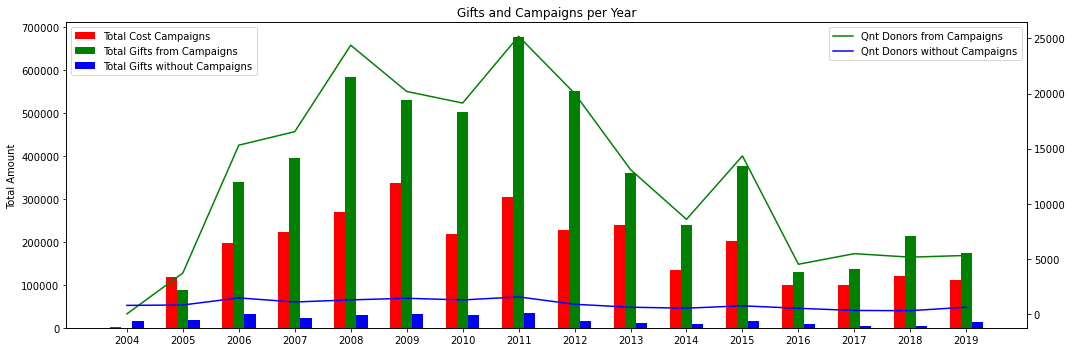

In [1160]:
#Create a graph

#labels and bar infos
labels = list(campaigns_year.index)
total_camp_cost = list(campaigns_year["total_cost"])
total_gift_camp = list(gifts_year_camp["total_gift"])
total_gift_no_camp = list(gifts_year_no_camp["total_gift"])
print(len(total_gift_no_camp))

#graph parameters
x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars
fig, ax = plt.subplots(figsize=(15,5))

#bar plot
rects1 = ax.bar(x - 0.20, total_camp_cost, width, label='Total Cost Campaigns', color='red')
rects2 = ax.bar(x       , total_gift_camp, width, label='Total Gifts from Campaigns', color='green')
rects3 = ax.bar(x + 0.20, total_gift_no_camp, width, label='Total Gifts without Campaigns', color='blue')

#line plot
ax2 = ax.twinx()
ax2.plot(gifts_year_camp["qnt_donors"], label='Qnt Donors from Campaigns', color='green')
ax2.plot(gifts_year_no_camp["qnt_donors"], label='Qnt Donors without Campaigns', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Amount')
ax.set_title('Gifts and Campaigns per Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=2)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()

### Gifts & Campaigns

In [1161]:
gifts_campaigns = gifts.groupby("campaignID").agg({'donorID' : 'count','amount':'sum'})
gifts_campaigns = gifts_campaigns.reset_index()
gifts_campaigns = gifts_campaigns.rename(columns={'donorID':'qnt_donors', 'amount':'total_gift'})

gifts_campaigns = pd.merge(gifts_campaigns, campaigns, how='left', on='campaignID')
gifts_campaigns = gifts_campaigns[["campaignID", "year_campaigns", "month_campaigns", "lettersSent", "total_cost_camp","qnt_donors","total_gift"]]
gifts_campaigns = gifts_campaigns[gifts_campaigns["campaignID"] !=0]
gifts_campaigns["profit"] = gifts_campaigns["total_gift"] - gifts_campaigns["total_cost_camp"]

gifts_campaigns.tail()

,campaignID,year_campaigns,month_campaigns,lettersSent,total_cost_camp,qnt_donors,total_gift,profit
363,7494,2019,10,8539.0,1195.46,8,256.00,-939.46
364,7503,2019,10,6126.0,918.90,5,216.00,-702.90
365,7505,2019,11,29746.0,3569.52,327,9290.25,5720.73
366,7519,2019,11,35199.0,12671.64,466,17013.19,4341.55
367,7536,2019,12,37187.0,13015.45,73,4170.11,-8845.34


In [1162]:
campaigns[campaigns["campaignID"]==7494]

,campaignID,date_campaigns,lettersSent,CostUnit,total_cost_camp,year_campaigns,month_campaigns,year_month_campaigns
362,7494,2019-10-17,8539,0.14,1195.46,2019,10,2019/10


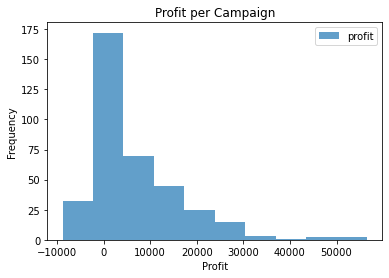

In [1163]:
fig, ax = plt.subplots()

ax.hist(gifts_campaigns["profit"], label="profit", alpha=0.7)
ax.set_title("Profit per Campaign")
ax.set_ylabel("Frequency")
ax.set_xlabel("Profit")
ax.legend()


plt.show()

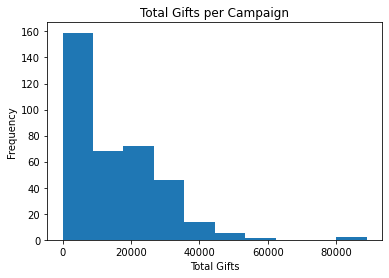

In [1164]:
fig, ax = plt.subplots()

ax.hist(gifts_campaigns["total_gift"])
ax.set_title("Total Gifts per Campaign")
ax.set_ylabel("Frequency")
ax.set_xlabel("Total Gifts")

plt.show()

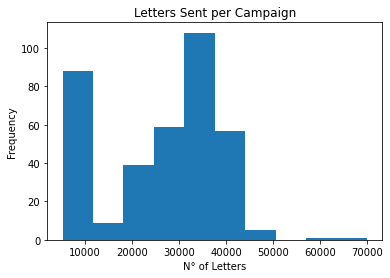

In [1165]:
fig, ax = plt.subplots()

ax.hist(gifts_campaigns["lettersSent"])
ax.set_title("Letters Sent per Campaign")
ax.set_ylabel("Frequency")
ax.set_xlabel("N° of Letters")

plt.show()

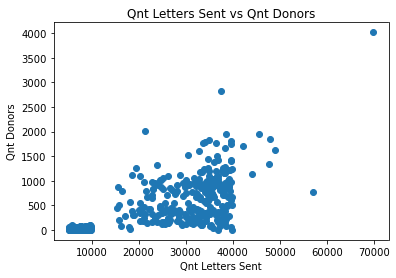

In [1166]:
fig, ax = plt.subplots()

ax.scatter(gifts_campaigns["lettersSent"],gifts_campaigns["qnt_donors"] )
ax.set_title("Qnt Letters Sent vs Qnt Donors")
ax.set_ylabel("Qnt Donors")
ax.set_xlabel("Qnt Letters Sent")

plt.show()

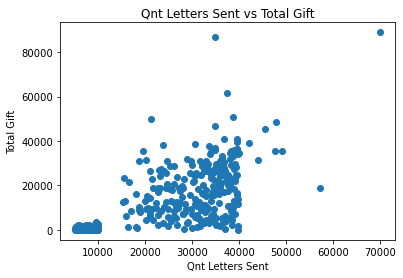

In [1167]:
fig, ax = plt.subplots()

ax.scatter(gifts_campaigns["lettersSent"],gifts_campaigns["total_gift"] )
ax.set_title("Qnt Letters Sent vs Total Gift")
ax.set_ylabel("Total Gift")
ax.set_xlabel("Qnt Letters Sent")

plt.show()

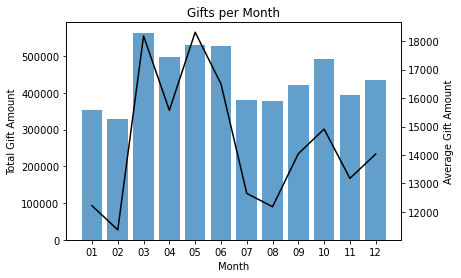

In [1168]:
a = gifts_campaigns.groupby("month_campaigns")["total_gift"].agg(['sum', 'mean'])

fig, ax = plt.subplots()

ax.bar(a.index,a["sum"], alpha=0.7)

ax2 = ax.twinx()
ax2.plot(a.index, a["mean"], color="black")

ax.set_title("Gifts per Month")
ax.set_ylabel("Total Gift Amount")
ax.set_xlabel("Month")
ax2.set_ylabel("Average Gift Amount")
plt.show()

### Donors and Campains

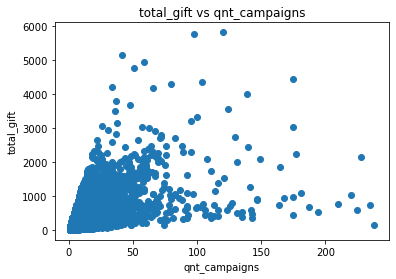

In [1169]:
donors_gifts = gifts.groupby("donorID").agg({'campaignID' : 'count','amount':'sum'})
donors_gifts = donors_gifts.reset_index()
donors_gifts = donors_gifts.rename(columns={'campaignID':'qnt_campaigns', 'amount':'total_gift'})
donors_gifts.head()

fig, ax = plt.subplots()
ax.scatter(donors_gifts["qnt_campaigns"],donors_gifts["total_gift"] )
ax.set_title("total_gift vs qnt_campaigns")
ax.set_ylabel("total_gift")
ax.set_xlabel("qnt_campaigns")
plt.show()

### Total Amount per gift value

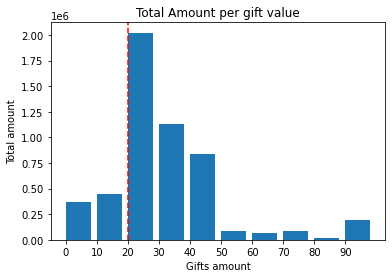

In [1170]:
gifts['group_amount'] = pd.cut(gifts['amount'], [0,10,20,30,40,50,60,70,80,90,100,110,120,130], labels = ["0","10","20","30","40","50","60","70","80","90","100","110","120"])
gifts.head()
gifts2 = gifts.groupby('group_amount')['amount'].sum().reset_index().rename({'amount':'Total gifts amount'}, axis=1).head(10)

fig, ax = plt.subplots()
ax.bar(gifts2['group_amount'], gifts2['Total gifts amount'], align = 'edge')
ax.set_xlabel("Gifts amount")
ax.set_ylabel("Total amount")
ax.set_title('Total Amount per gift value')
plt.axvline(x=2,color='red',linestyle='--')
plt.show()

### Campaign 6169

In [1171]:
# Merge Campaign 6169  with gifts to identify the owner who donated
gifts_6169 = gifts[gifts["campaignID"] == 6169]
gifts_6169 = gifts_6169[["donorID","amount"]]
campaign6169 = pd.merge(campaign6169, gifts_6169, how="left", on="donorID")

# Fill nan values, since the nan means that the donors didn't donate on the campaign
campaign6169 = campaign6169.fillna(0)

# Merge Campaign 6169  with donors to get their characteristics
campaign6169 = pd.merge(campaign6169, donors, how="left", on="donorID")

# Drop the nan values from the donors data: nan values means that there is no information regarding the owner
campaign6169 = campaign6169.dropna()

# Drop the owner who their region is missing
campaign6169 = campaign6169[campaign6169["region"]!="Missing"]

In [1172]:
#Quick overview about the campaign 6169
print("Total Donors Contacted:", campaign6169["donorID"].count())
print("Total Donors who Donated:", campaign6169[campaign6169["amount"]>0]["donorID"].count())
print("Response Rate:", round(campaign6169[campaign6169["amount"]>0]["donorID"].count()/campaign6169["donorID"].count(),3))
print("Total Cost of Campaign:",campaigns[campaigns["campaignID"]==6169]["total_cost_camp"].min())
print("Total Amount Gifts:", campaign6169["amount"].sum())
print("Profit Rate:", round(campaign6169["amount"].sum()/campaigns[campaigns["campaignID"]==6169]["total_cost_camp"].min(),3))
campaign6169.head()

Total Donors Contacted: 34872
Total Donors who Donated: 1176
Response Rate: 0.034
Total Cost of Campaign: 30352.56
Total Amount Gifts: 85977.09999999999
Profit Rate: 2.833


,donorID,amount,zipcode,province,region,gender,language,dateOfBirth
0,100001,0.0,1861.0,Flemish Brabant,Flanders,0,NL,1967-12-24
1,100002,0.0,2260.0,Antwerp,Flanders,1,NL,1952-01-14
2,100004,0.0,1020.0,Brussels,Brussels,0,FR,1952-03-29
3,100008,0.0,1780.0,Flemish Brabant,Flanders,1,FR,1937-08-30
4,100009,0.0,1020.0,Brussels,Brussels,1,FR,1932-01-20


### Campaign 7244

In [1173]:
# Merge Campaign 6169  with gifts to identify the owner who donated
gifts_7244 = gifts[gifts["campaignID"] == 7244]
gifts_7244 = gifts_7244[["donorID","amount"]]
campaign7244 = pd.merge(campaign7244, gifts_7244, how="left", on="donorID")

# Fill nan values, since the nan means that the donors didn't donate on the campaign
campaign7244 = campaign7244.fillna(0)

# Merge Campaign 6169  with donors to get their characteristics
campaign7244 = pd.merge(campaign7244, donors, how="left", on="donorID")

# Drop the nan values from the donors data: nan values means that there is no information regarding the owner
campaign7244 = campaign7244.dropna()

# Drop the owner who their region is missing
campaign7244 = campaign7244[campaign7244["region"]!="Missing"]

In [1174]:
#Quick overview about the campaign 7244
print("Total Donors Contacted:", campaign7244["donorID"].count())
print("Total Donors who Donated:", campaign7244[campaign7244["amount"]>0]["donorID"].count())
print("Response Rate:", round(campaign7244[campaign7244["amount"]>0]["donorID"].count()/campaign7244["donorID"].count(),3))
print("Total Cost of Campaign:",campaigns[campaigns["campaignID"]==7244]["total_cost_camp"].min())
print("Total Amount Gifts:", campaign7244["amount"].sum())
print("Profit Rate:", round(campaign7244["amount"].sum()/campaigns[campaigns["campaignID"]==7244]["total_cost_camp"].min(),3))
campaign7244.head()

Total Donors Contacted: 25644
Total Donors who Donated: 361
Response Rate: 0.014
Total Cost of Campaign: 14104.750000000002
Total Amount Gifts: 18049.5
Profit Rate: 1.28


,donorID,amount,zipcode,province,region,gender,language,dateOfBirth
0,100001,0.0,1861,Flemish Brabant,Flanders,0,NL,1967-12-24
1,100002,0.0,2260,Antwerp,Flanders,1,NL,1952-01-14
2,100008,0.0,1780,Flemish Brabant,Flanders,1,FR,1937-08-30
3,100009,0.0,1020,Brussels,Brussels,1,FR,1932-01-20
4,100010,0.0,1020,Brussels,Brussels,1,FR,1983-05-30


## Basetable

### Function to get Gift Historical Data of Donors

#### Gifts related with Campaigns

In [1175]:
# Create aggregate table with the donors and their respectives donation from the past 2 Years
def camp_gifts (campaign_date, years):
    #Define the last date of the period (1 month before campaign drop date, dut to timeline issues)
    end_date = campaign_date - dt.timedelta(days=30)
    end_date = end_date - dt.timedelta(days=(years-1)*365)
    end_date = end_date.strftime('%Y-%m-%d')

    #Define the first date of the period
    start_date = campaign_date - dt.timedelta(days=(years*365)+30)
    start_date = start_date.strftime('%Y-%m-%d')

    #Filter the gifts data according to the period of donations above      
    donors_data = gifts.loc[(gifts['date_gifts'] >= start_date) & (gifts['date_gifts'] <= end_date)]

    #Filter only gifts from campaigns
    donors_data = donors_data[donors_data["campaignID"]!=0]

    #Group by donors
    donors_data = donors_data.groupby("donorID").agg({'campaignID' : 'count','amount':'sum'})
    donors_data = donors_data.reset_index()
    donors_data = donors_data.rename(columns={'campaignID':'camp_gifts_freq_'+str(years)+'Y', 'amount':'camp_gifts_amount_'+str(years)+'Y'})
       
    print("Gifts Historical Period (Past", str(years), "Years): From", start_date, "To", end_date)

    return donors_data

#### Gifts not related with Campaigns

In [1176]:
def no_camp_gifts (campaign_date, years):
    #Define the last date of the period (1 month before campaign drop date, dut to timeline issues)
    end_date = campaign_date - dt.timedelta(days=30)
    end_date = end_date - dt.timedelta(days=(years-1)*365)
    end_date = end_date.strftime('%Y-%m-%d')

    #Define the first date of the period
    start_date = campaign_date - dt.timedelta(days=(years*365)+30)
    start_date = start_date.strftime('%Y-%m-%d')

    #Filter the gifts data according to the period of donations above      
    donors_data = gifts.loc[(gifts['date_gifts'] >= start_date) & (gifts['date_gifts'] <= end_date)]

    #Filter only gifts from campaigns
    donors_data = donors_data[donors_data["campaignID"]==0]

    #Group by donors
    donors_data = donors_data.groupby("donorID").agg({'campaignID' : 'count','amount':'sum'})
    donors_data = donors_data.reset_index()
    donors_data = donors_data.rename(columns={'campaignID':'no_camp_gifts_freq_'+str(years)+'Y', 'amount':'no_camp_gifts_amount_'+str(years)+'Y'})
        
    return donors_data


### Function to build the basetable

In [1177]:
def basetable (campaign_table, campaign_date):
    
    # Get the drop date of the campaign
    #campaign_date = campaigns[campaigns["campaignID"] == campaign_id]["date_campaigns"].min()
    print("Campaign Date:", campaign_date.strftime('%Y-%m-%d'))
    
    #Start to build the basetable from the campaign dataset
    model_data = campaign_table
  
    #calculate the donors age
    # Source: https://moonbooks.org/Articles/How-to-convert-a-dataframe-column-of-date-of-birth-DOB-to-column-of-age-with-pandas-in-python-/
    def from_dob_to_age(born):
        today = campaign_date - dt.timedelta(days=30)
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

    model_data["age"] = model_data['dateOfBirth'].apply(lambda x: from_dob_to_age(x))    
    model_data["age_group"] = model_data["age"].astype(str).str[:1].astype(int) * 10
            
    # Recency: Last time that the donors donated
    end_date = campaign_date - dt.timedelta(days=30)
    recency = gifts.loc[gifts['date_gifts'] <= end_date]
    recency = recency.sort_values('date_gifts').groupby('donorID').tail(1)
    recency["recency"] = end_date - recency["date_gifts"]
    recency["recency"] = recency["recency"].dt.days
    recency["recency"] = round(recency["recency"]/365,3)
    recency = recency[["donorID","recency"]]
    
    # Get the donors gifts from campaign 
    donors_1Y = camp_gifts (campaign_date, 1)
    donors_2Y = camp_gifts (campaign_date, 2)
    donors_3Y = camp_gifts (campaign_date, 3)
    donors_4Y = camp_gifts (campaign_date, 4)
    donors_5Y = camp_gifts (campaign_date, 5)
    donors_6Y = camp_gifts (campaign_date, 6)
    donors_7Y = camp_gifts (campaign_date, 7)
    donors_8Y = camp_gifts (campaign_date, 8)
    donors_9Y = camp_gifts (campaign_date, 9)
    donors_10Y = camp_gifts (campaign_date, 10)
    
    # Get donors gifts without campaigns
    donors_1Y_no_camp = no_camp_gifts (campaign_date, 1)
    donors_2Y_no_camp = no_camp_gifts (campaign_date, 2)
    donors_3Y_no_camp = no_camp_gifts (campaign_date, 3)
    donors_4Y_no_camp = no_camp_gifts (campaign_date, 4)
    donors_5Y_no_camp = no_camp_gifts (campaign_date, 5)
    donors_6Y_no_camp = no_camp_gifts (campaign_date, 6)
    donors_7Y_no_camp = no_camp_gifts (campaign_date, 7)
    donors_8Y_no_camp = no_camp_gifts (campaign_date, 8)
    donors_9Y_no_camp = no_camp_gifts (campaign_date, 9)
    donors_10Y_no_camp = no_camp_gifts (campaign_date, 10)

    #Merge with recency table
    model_data = pd.merge(model_data, recency, how="left", on="donorID")
        
    #Merge gifts from Campaings
    model_data = pd.merge(model_data, donors_1Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_2Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_3Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_4Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_5Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_6Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_7Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_8Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_9Y, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_10Y, how="left", on="donorID")
    
    #Merge gifts without Campaings
    model_data = pd.merge(model_data, donors_1Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_2Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_3Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_4Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_5Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_6Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_7Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_8Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_9Y_no_camp, how="left", on="donorID")
    model_data = pd.merge(model_data, donors_10Y_no_camp, how="left", on="donorID")
    
    #Calculating the Amount per Frequency Rate
    model_data["amount_freq_1"] = model_data["camp_gifts_amount_1Y"]/model_data["camp_gifts_freq_1Y"]
    model_data["amount_freq_2"] = model_data["camp_gifts_amount_2Y"]/model_data["camp_gifts_freq_2Y"]
    model_data["amount_freq_3"] = model_data["camp_gifts_amount_3Y"]/model_data["camp_gifts_freq_3Y"]
    model_data["amount_freq_4"] = model_data["camp_gifts_amount_4Y"]/model_data["camp_gifts_freq_4Y"]
    model_data["amount_freq_5"] = model_data["camp_gifts_amount_5Y"]/model_data["camp_gifts_freq_5Y"]
    model_data["amount_freq_6"] = model_data["camp_gifts_amount_6Y"]/model_data["camp_gifts_freq_6Y"]
    model_data["amount_freq_7"] = model_data["camp_gifts_amount_7Y"]/model_data["camp_gifts_freq_7Y"]
    model_data["amount_freq_8"] = model_data["camp_gifts_amount_8Y"]/model_data["camp_gifts_freq_8Y"]
    model_data["amount_freq_9"] = model_data["camp_gifts_amount_9Y"]/model_data["camp_gifts_freq_9Y"]
    model_data["amount_freq_10"] = model_data["camp_gifts_amount_10Y"]/model_data["camp_gifts_freq_10Y"]
    
    model_data["no_amount_freq_1"] = model_data["no_camp_gifts_amount_1Y"]/model_data["no_camp_gifts_freq_1Y"]
    model_data["no_amount_freq_2"] = model_data["no_camp_gifts_amount_2Y"]/model_data["no_camp_gifts_freq_2Y"]
    model_data["no_amount_freq_3"] = model_data["no_camp_gifts_amount_3Y"]/model_data["no_camp_gifts_freq_3Y"]
    model_data["no_amount_freq_4"] = model_data["no_camp_gifts_amount_4Y"]/model_data["no_camp_gifts_freq_4Y"]
    model_data["no_amount_freq_5"] = model_data["no_camp_gifts_amount_5Y"]/model_data["no_camp_gifts_freq_5Y"]
    model_data["no_amount_freq_6"] = model_data["no_camp_gifts_amount_6Y"]/model_data["no_camp_gifts_freq_6Y"]
    model_data["no_amount_freq_7"] = model_data["no_camp_gifts_amount_7Y"]/model_data["no_camp_gifts_freq_7Y"]
    model_data["no_amount_freq_8"] = model_data["no_camp_gifts_amount_8Y"]/model_data["no_camp_gifts_freq_8Y"]
    model_data["no_amount_freq_9"] = model_data["no_camp_gifts_amount_9Y"]/model_data["no_camp_gifts_freq_9Y"]
    model_data["no_amount_freq_10"] = model_data["no_camp_gifts_amount_10Y"]/model_data["no_camp_gifts_freq_10Y"]
    
    # Create the target variable
    model_data.loc[model_data['amount'] >= 20, 'target'] = 1
    model_data.loc[model_data['amount'] < 20, 'target'] = 0
    
    #Drop nan from recency variable
    model_data = model_data[model_data["recency"].notna()]
    
    # Fill the amount and freq values of the gifts by 0
    model_data = model_data.fillna(0)
   
    #Drop variables that will not be used in the model
    model_data = model_data.drop(['amount'], axis=1)
    model_data = model_data.drop(['dateOfBirth'], axis=1)
    model_data = model_data.drop(['zipcode'], axis=1)
    model_data = model_data.drop(['province'], axis=1)
    model_data = model_data.drop(['age'], axis=1)
    
    model_data = model_data.drop(['camp_gifts_freq_1Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_2Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_3Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_4Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_5Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_6Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_7Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_8Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_9Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_freq_10Y'], axis=1)
    
    model_data = model_data.drop(['no_camp_gifts_freq_1Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_2Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_3Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_4Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_5Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_6Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_7Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_8Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_9Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_freq_10Y'], axis=1)  
    
    model_data = model_data.drop(['camp_gifts_amount_1Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_2Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_3Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_4Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_5Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_6Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_7Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_8Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_9Y'], axis=1)
    model_data = model_data.drop(['camp_gifts_amount_10Y'], axis=1)
    
    model_data = model_data.drop(['no_camp_gifts_amount_1Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_2Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_3Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_4Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_5Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_6Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_7Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_8Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_9Y'], axis=1)
    model_data = model_data.drop(['no_camp_gifts_amount_10Y'], axis=1)
    
    #Sort daset 
    #model_data = model_data.sort_values(by=['camp_gifts_amount_1Y'], ascending=False)

    return model_data

### Function to enconde the variables

In [1178]:
#Enconding Variables

def enconding_var (df):
    
    #Transform to int
    df['gender'] = df['gender'].astype(int)
    #df['age'] = df['age'].astype(int)
    df['target'] = df['target'].astype(int)
    
    #Dummy Enconding    
    df = df.join(pd.get_dummies(df['region'], prefix = "region_is", drop_first = False))
    df = df.drop(columns=['region'])
    df = df.join(pd.get_dummies(df['language'], prefix = "language_is", drop_first = False))
    df = df.drop(columns=['language'])
    
    return df

### Train Data (Campaign 6169)

In [1179]:
campaign6169_date = campaigns[campaigns["campaignID"] == 6169]["date_campaigns"].min()

train_data = basetable (campaign6169,campaign6169_date)
train_data = enconding_var (train_data)
train_data.head()

Campaign Date: 2018-09-04
Gifts Historical Period (Past 1 Years): From 2017-08-05 To 2018-08-05
Gifts Historical Period (Past 2 Years): From 2016-08-05 To 2017-08-05
Gifts Historical Period (Past 3 Years): From 2015-08-06 To 2016-08-05
Gifts Historical Period (Past 4 Years): From 2014-08-06 To 2015-08-06
Gifts Historical Period (Past 5 Years): From 2013-08-06 To 2014-08-06
Gifts Historical Period (Past 6 Years): From 2012-08-06 To 2013-08-06
Gifts Historical Period (Past 7 Years): From 2011-08-07 To 2012-08-06
Gifts Historical Period (Past 8 Years): From 2010-08-07 To 2011-08-07
Gifts Historical Period (Past 9 Years): From 2009-08-07 To 2010-08-07
Gifts Historical Period (Past 10 Years): From 2008-08-07 To 2009-08-07


,donorID,gender,age_group,recency,amount_freq_1,amount_freq_2,amount_freq_3,amount_freq_4,amount_freq_5,amount_freq_6,...,no_amount_freq_8,no_amount_freq_9,no_amount_freq_10,target,region_is_Brussels,region_is_Flanders,region_is_Wallonia,language_is_EN,language_is_FR,language_is_NL
0,100001,0,50,6.603,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1
1,100002,1,60,3.570,0.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1
2,100004,0,60,7.178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0
3,100008,1,80,6.775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,1,0
4,100009,1,80,6.367,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0


In [1180]:
train_data.dtypes

donorID                 int64
gender                  int32
age_group               int32
recency               float64
amount_freq_1         float64
amount_freq_2         float64
amount_freq_3         float64
amount_freq_4         float64
amount_freq_5         float64
amount_freq_6         float64
amount_freq_7         float64
amount_freq_8         float64
amount_freq_9         float64
amount_freq_10        float64
no_amount_freq_1      float64
no_amount_freq_2      float64
no_amount_freq_3      float64
no_amount_freq_4      float64
no_amount_freq_5      float64
no_amount_freq_6      float64
no_amount_freq_7      float64
no_amount_freq_8      float64
no_amount_freq_9      float64
no_amount_freq_10     float64
target                  int32
region_is_Brussels      uint8
region_is_Flanders      uint8
region_is_Wallonia      uint8
language_is_EN          uint8
language_is_FR          uint8
language_is_NL          uint8
dtype: object

### Test Data (Campaign 7244)

In [1181]:
campaign7244_date = campaigns[campaigns["campaignID"] == 7244]["date_campaigns"].min()

test_data = basetable (campaign7244,campaign7244_date)
test_data = enconding_var (test_data)
test_data.head()

Campaign Date: 2019-06-18
Gifts Historical Period (Past 1 Years): From 2018-05-19 To 2019-05-19
Gifts Historical Period (Past 2 Years): From 2017-05-19 To 2018-05-19
Gifts Historical Period (Past 3 Years): From 2016-05-19 To 2017-05-19
Gifts Historical Period (Past 4 Years): From 2015-05-20 To 2016-05-19
Gifts Historical Period (Past 5 Years): From 2014-05-20 To 2015-05-20
Gifts Historical Period (Past 6 Years): From 2013-05-20 To 2014-05-20
Gifts Historical Period (Past 7 Years): From 2012-05-20 To 2013-05-20
Gifts Historical Period (Past 8 Years): From 2011-05-21 To 2012-05-20
Gifts Historical Period (Past 9 Years): From 2010-05-21 To 2011-05-21
Gifts Historical Period (Past 10 Years): From 2009-05-21 To 2010-05-21


,donorID,gender,age_group,recency,amount_freq_1,amount_freq_2,amount_freq_3,amount_freq_4,amount_freq_5,amount_freq_6,...,no_amount_freq_8,no_amount_freq_9,no_amount_freq_10,target,region_is_Brussels,region_is_Flanders,region_is_Wallonia,language_is_EN,language_is_FR,language_is_NL
0,100001,0,50,7.389,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1
1,100002,1,60,4.356,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1
2,100008,1,80,7.562,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,1,0
3,100009,1,80,7.153,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0
4,100010,1,30,4.348,0.0,0.0,0.0,0.0,40.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0


In [1182]:
test_data.dtypes

donorID                 int64
gender                  int32
age_group               int32
recency               float64
amount_freq_1         float64
amount_freq_2         float64
amount_freq_3         float64
amount_freq_4         float64
amount_freq_5         float64
amount_freq_6         float64
amount_freq_7         float64
amount_freq_8         float64
amount_freq_9         float64
amount_freq_10        float64
no_amount_freq_1      float64
no_amount_freq_2      float64
no_amount_freq_3      float64
no_amount_freq_4      float64
no_amount_freq_5      float64
no_amount_freq_6      float64
no_amount_freq_7      float64
no_amount_freq_8      float64
no_amount_freq_9      float64
no_amount_freq_10     float64
target                  int32
region_is_Brussels      uint8
region_is_Flanders      uint8
region_is_Wallonia      uint8
language_is_EN          uint8
language_is_FR          uint8
language_is_NL          uint8
dtype: object

## Predictive Model

In [1183]:
from scipy.stats          import pearsonr
from sklearn.linear_model import LogisticRegression
from pandas               import DataFrame
from sklearn.metrics      import roc_auc_score
from numpy                import array

### Features Selection

In [1184]:
selectedFeatures = []
target = "target"

for column in train_data.columns:
    if column not in ("donorID","target"):
        (pearson,pvalue) = pearsonr(train_data[column],train_data[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

gender - p-vlue = 8.380253453138795e-91 - selected : 1
age_group - p-vlue = 1.465140238163929e-84 - selected : 1
recency - p-vlue = 2.0648928795634226e-08 - selected : 1
amount_freq_1 - p-vlue = 0.2818172000577349 - selected : 0
amount_freq_2 - p-vlue = 0.0013255495450984769 - selected : 0
amount_freq_3 - p-vlue = 0.0021003796829327116 - selected : 0
amount_freq_4 - p-vlue = 4.967987507739452e-17 - selected : 1
amount_freq_5 - p-vlue = 2.0033998631164948e-13 - selected : 1
amount_freq_6 - p-vlue = 1.900650551540259e-11 - selected : 1
amount_freq_7 - p-vlue = 1.6090809924107805e-13 - selected : 1
amount_freq_8 - p-vlue = 6.178265493172921e-06 - selected : 1
amount_freq_9 - p-vlue = 0.002668901149599617 - selected : 0
amount_freq_10 - p-vlue = 0.001995815152632038 - selected : 0
no_amount_freq_1 - p-vlue = 0.7206290156705935 - selected : 0
no_amount_freq_2 - p-vlue = 0.67173604541843 - selected : 0
no_amount_freq_3 - p-vlue = 0.9548645415994012 - selected : 0
no_amount_freq_4 - p-vlue = 

In [1185]:
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

In [1186]:
features = selectedFeatures
target   = "target"

### Select the model

In [1187]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [1188]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [1189]:
for model in models:
    models[model].fit(train_data[features],train_data[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


### Evaluate Models Performance

#### Accuracy and AUC

In [1190]:
performances = {}

for model in models:
    predictions   = models[model].predict(test_data[features])
    probabilities = DataFrame(models[model].predict_proba(test_data[features]))[1]
    accuracy      = accuracy_score(test_data[target],predictions)
    auc           = roc_auc_score(array(test_data[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [1191]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.973833,0.988925,0.980385,0.987365,0.988964,0.988535,0.987521
AUC,0.521414,0.628607,0.618243,0.640418,0.502191,0.637642,0.553827


#### Lift and Cumulative Gains

In [1192]:
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [1193]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(test_data[target]).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(test_data[features]))[1]
    lifts[model] = lift(dataSet = data, actuals = "target", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "target", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "target", probability = "proba "+str(model))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [1194]:
data.head()

,target,proba tree,proba logistic,proba randomForest,proba boostedTree,proba svm,proba neuralNet,proba neighbors
0,0,0.0,0.043027,0.00,0.034445,0.028084,0.020957,0.0
1,0,0.0,0.017449,0.00,0.011104,0.028089,0.018101,0.2
2,0,0.0,0.035914,0.01,0.038408,0.028068,0.026119,0.2
3,0,1.0,0.033112,0.05,0.039412,0.028101,0.008618,0.0
4,0,0.0,0.006544,0.00,0.010461,0.028084,0.007595,0.0


In [1195]:
from matplotlib             import pyplot

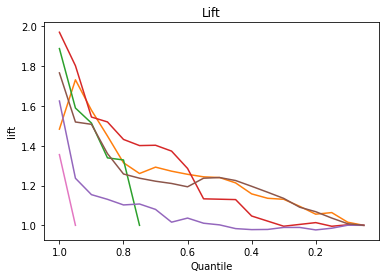

In [1196]:
for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")

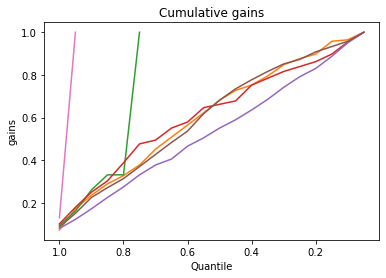

In [1197]:
for model in models:
    pyplot.plot(gains[model]["Quantile"], gains[model]["Cumulative gains"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("gains")
    pyplot.title("Cumulative gains")

In [1198]:
# To fix the index of the graphs for the selected model
dictionary = {1.00 : 0.05, 
              0.95 : 0.10, 
              0.90 : 0.15, 
              0.85 : 0.20, 
              0.80 : 0.25, 
              0.75 : 0.30, 
              0.70 : 0.35, 
              0.65 : 0.40, 
              0.60 : 0.45, 
              0.55 : 0.50,
              0.50 : 0.55,
              0.45 : 0.60,
              0.40 : 0.65,
              0.35 : 0.70,
              0.30 : 0.75,
              0.25 : 0.80,
              0.20 : 0.85,
              0.15 : 0.90,
              0.10 : 0.95,
              0.05 : 1.00
             }

### Model Selected: boostedTree

#### Confusion Matrix

In [1199]:
# Adding the probability column to the test dataset
test_data.loc[:,'prob'] = DataFrame(models["boostedTree"].predict_proba(test_data[selectedFeatures]))[1]
test_data = test_data.sort_values(by=["prob"],ascending=False)

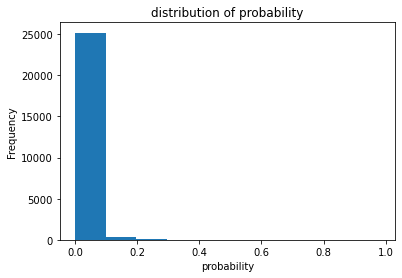

In [1200]:
# Check how the probability of the model is working
fig, ax = plt.subplots()
ax.hist(test_data["prob"])
ax.set_title("distribution of probability")
ax.set_ylabel("Frequency")
ax.set_xlabel("probability")
plt.show()

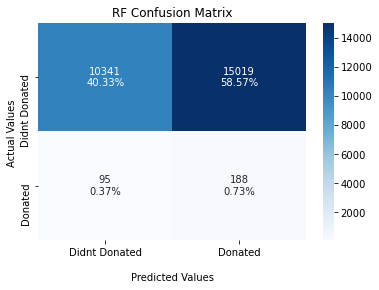

In [1201]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix

cf_matrix = confusion_matrix(test_data["target"], np.where(test_data["prob"]>0.01, 1, 0))
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('RF Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Didnt Donated','Donated'])
ax.yaxis.set_ticklabels(['Didnt Donated','Donated'])## Display the visualization of the Confusion Matrix.
plt.show()

#### Response, Lift and Cumulative Gains

In [1202]:
# Adjusting the quantile index for Responses
responses2 = responses["boostedTree"]
responses2['Quantile2'] = responses2['Quantile'].map(dictionary)
responses2.head(5)

,Quantile,Cumulative response,Average response,Quantile2
16,1.00,0.021739,0.011037,0.05
15,0.95,0.019883,0.011037,0.10
14,0.90,0.017039,0.011037,0.15
13,0.85,0.016767,0.011037,0.20
12,0.80,0.015798,0.011037,0.25


Text(0.5, 1.0, 'Cumulative response')

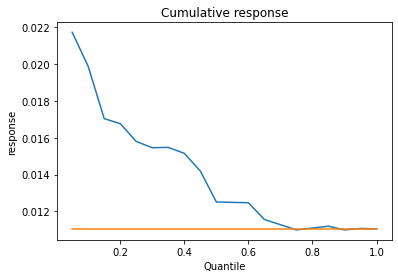

In [1203]:
pyplot.plot(responses2["Quantile2"], responses2["Cumulative response"])
pyplot.plot(responses2["Quantile2"], responses2["Average response"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("response")
pyplot.title("Cumulative response")

In [1204]:
# Adjusting the quantile index for lifts
lifts2 = lifts["boostedTree"]
lifts2['Quantile2'] = lifts2['Quantile'].map(dictionary)
lifts2.head(5)

,Quantile,Lift,Base,Quantile2
16,1.00,1.969734,1.0,0.05
15,0.95,1.801558,1.0,0.10
14,0.90,1.543833,1.0,0.15
13,0.85,1.519257,1.0,0.20
12,0.80,1.431402,1.0,0.25


Text(0.5, 1.0, 'Lift')

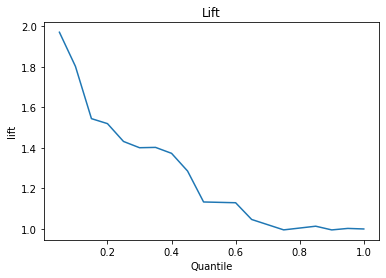

In [1205]:
pyplot.plot(lifts2["Quantile2"], lifts2["Lift"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("lift")
pyplot.title("Lift")

In [1206]:
# Adjusting the quantile index for gains
gains2 = gains["boostedTree"]
gains2['Quantile2'] = gains2['Quantile'].map(dictionary)
gains2.head(5)

,Quantile,Cumulative gains,Base,Quantile2
16,1.00,0.102473,1.00,0.05
15,0.95,0.180212,0.95,0.10
14,0.90,0.250883,0.90,0.15
13,0.85,0.303887,0.85,0.20
12,0.80,0.388693,0.80,0.25


Text(0.5, 1.0, 'Cumulative gains')

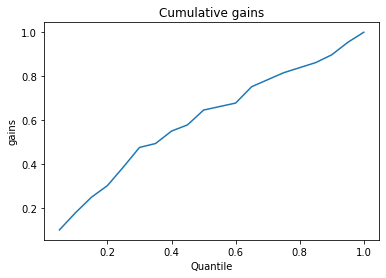

In [1207]:
pyplot.plot(gains2["Quantile2"], gains2["Cumulative gains"])
pyplot.gca()
pyplot.xlabel("Quantile")
pyplot.ylabel("gains")
pyplot.title("Cumulative gains")

#### Response Rate - Quantile 0.99

In [1208]:
# Using our model, if we reach 1% of the population, our campaign response rate is 4.28%
# average campaign response rate is 1.8%
subset = test_data[test_data.prob > test_data.prob.quantile(.99)]

targetcount = subset[subset['target']==1]['target'].value_counts()
subsetcount = subset['donorID'].nunique()
(targetcount / subsetcount) * 100

1    3.501946
Name: target, dtype: float64

### Donors Profile

In [1209]:
profile = subset[["donorID","gender","age_group","recency","region_is_Brussels","region_is_Flanders","region_is_Wallonia","language_is_EN","language_is_FR","language_is_NL","prob"]]

#### Gender

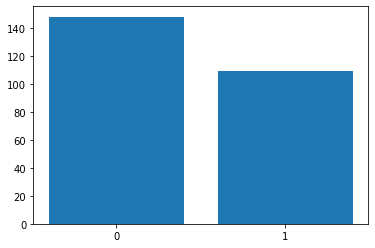

In [1210]:
# Vizualizing the gender 
gender = ["0", "1"]
amount = subset['gender'].value_counts()
plt.bar(gender, amount)
plt.show()

#### Age

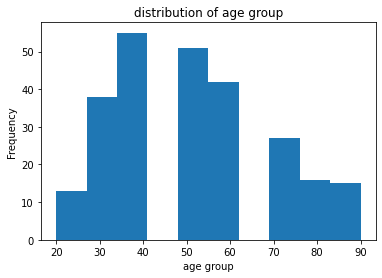

In [1211]:
# Vizualizing the age group
fig, ax = plt.subplots()

ax.hist(subset["age_group"])
ax.set_title("distribution of age group")
ax.set_ylabel("Frequency")
ax.set_xlabel("age group")

plt.show()

#### Recency

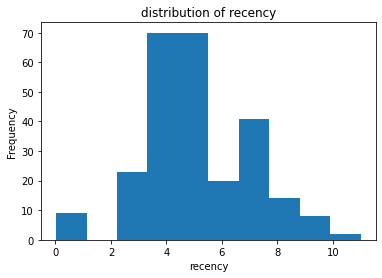

In [1212]:
# Vizualizing recency years
fig, ax = plt.subplots()

ax.hist(subset["recency"])
ax.set_title("distribution of recency")
ax.set_ylabel("Frequency")
ax.set_xlabel("recency")

plt.show()

#### Region

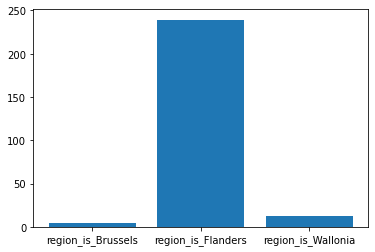

In [1213]:
# Vizualizing region
subset["region_is_Brussels"].value_counts()
subset["region_is_Flanders"].value_counts()
subset["region_is_Wallonia"].value_counts()
region = ["region_is_Brussels","region_is_Flanders","region_is_Wallonia"]
amount = [5, 239,13]
plt.bar(region, amount)
plt.show()

#### Language

In [1214]:
subset["language_is_EN"].value_counts()

0    257
Name: language_is_EN, dtype: int64

In [1215]:
subset["language_is_FR"].value_counts()

0    241
1     16
Name: language_is_FR, dtype: int64

In [1216]:
subset["language_is_NL"].value_counts()

1    241
0     16
Name: language_is_NL, dtype: int64

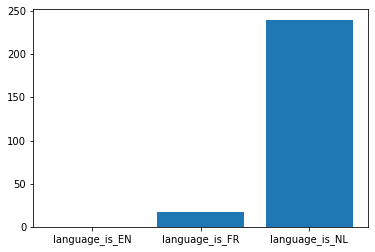

In [1217]:
# Vizualizing language
e = subset["language_is_EN"].value_counts()
f = subset["language_is_FR"].value_counts()
g = subset["language_is_NL"].value_counts()

language = ["language_is_EN","language_is_FR","language_is_NL"]
amount = [0, 17,240]
plt.bar(language, amount)
plt.show()

### Using the Model in a New Dataset

#### Import File

In [1218]:
# Import File
new_campaign = pd.read_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\raw\new_campaign_selection.csv")

# Merge Campaign 6169  with donors to get their characteristics
new_campaign = pd.merge(new_campaign, donors, how="left", on="donorID")

# Drop the nan values from the donors data: nan values means that there is no information regarding the owner
new_campaign = new_campaign.dropna()

# Drop the owner who their region is missing
new_campaign = new_campaign[new_campaign["region"]!="Missing"]

#Create a column amount (to use the same function of the others datasets - this columns and the target will be deleted after)
new_campaign['amount'] = 0

#### Adding the features to be used by the model

In [1219]:
newcampaign_date = dt.datetime.strptime('2020-02-01', '%Y-%m-%d')

usage_data = basetable (new_campaign,newcampaign_date)
usage_data = enconding_var (usage_data)
usage_data = usage_data.drop(['target'], axis=1)

usage_data.head()

Campaign Date: 2020-02-01
Gifts Historical Period (Past 1 Years): From 2019-01-02 To 2020-01-02
Gifts Historical Period (Past 2 Years): From 2018-01-02 To 2019-01-02
Gifts Historical Period (Past 3 Years): From 2017-01-02 To 2018-01-02
Gifts Historical Period (Past 4 Years): From 2016-01-03 To 2017-01-02
Gifts Historical Period (Past 5 Years): From 2015-01-03 To 2016-01-03
Gifts Historical Period (Past 6 Years): From 2014-01-03 To 2015-01-03
Gifts Historical Period (Past 7 Years): From 2013-01-03 To 2014-01-03
Gifts Historical Period (Past 8 Years): From 2012-01-04 To 2013-01-03
Gifts Historical Period (Past 9 Years): From 2011-01-04 To 2012-01-04
Gifts Historical Period (Past 10 Years): From 2010-01-04 To 2011-01-04


,donorID,gender,age_group,recency,amount_freq_1,amount_freq_2,amount_freq_3,amount_freq_4,amount_freq_5,amount_freq_6,...,no_amount_freq_7,no_amount_freq_8,no_amount_freq_9,no_amount_freq_10,region_is_Brussels,region_is_Flanders,region_is_Wallonia,language_is_EN,language_is_FR,language_is_NL
0,134242,1,50,6.096,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,126503,1,70,5.016,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0
2,104392,0,40,5.014,0.0,0.0,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0
3,105905,1,40,0.093,77.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
4,120506,1,40,8.008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1


#### Creating the probability column on the dataset

In [1220]:
usage_data.loc[:,'prob'] = DataFrame(models["boostedTree"].predict_proba(usage_data[selectedFeatures]))[1]
usage_data = usage_data.sort_values(by=["prob"],ascending=False)
usage_data = usage_data.fillna(0)
usage_data["prob"] = usage_data["prob"].astype(str).str[:5].astype(float)

usage_data

,donorID,gender,age_group,recency,amount_freq_1,amount_freq_2,amount_freq_3,amount_freq_4,amount_freq_5,amount_freq_6,...,no_amount_freq_8,no_amount_freq_9,no_amount_freq_10,region_is_Brussels,region_is_Flanders,region_is_Wallonia,language_is_EN,language_is_FR,language_is_NL,prob
20220,137488,0,20,6.104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.998
9458,132528,1,40,8.205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.998
23467,135185,1,40,4.197,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0,0,1,0,1,0,0.997
18423,135828,0,50,0.068,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.997
22578,133247,1,30,7.912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23555,125860,1,40,10.216,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.000
3435,135546,1,20,0.041,50.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0,0,1,0,1,0,0.000
26517,143259,1,20,3.186,0.0,0.0,0.0,40.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.000
26518,123936,1,40,2.496,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,0.000


#### Exporting Files

In [1221]:
test_data.to_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\processed\testcampaign.csv")
usage_data.to_csv(r"C:\Users\tdutrabruno\OneDrive - IESEG\IESEG\Descriptive and Predictive Analytics\PredictiveProject\data\processed\newcampaign.csv")